# Telecom Customer Churn  Project

## Data: 
* We have each row representing each customer.
* Customers who left the service is categorized as customer churn
* Services that each customer has signed up for – phone, multiple lines, internet, online * security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
* Churn - dependent feature ('Yes' denotes customers left, 'No' denotes customer stay here)

source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick

## Loading the Dataset

In [2]:
data = pd.read_csv("data/Telco-Customer-Churn.csv")


### Data Lookup

In [3]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(data.dtypes)
print(data.shape)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
(7043, 21)


## Exploratory Data Analysis

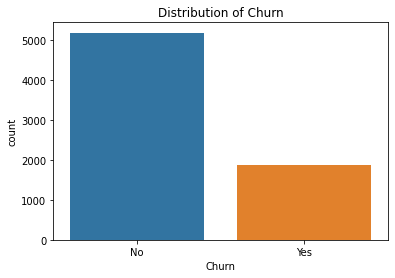

In [5]:
# Lets look at the target variable

sns.countplot(data,x="Churn")
plt.title("Distribution of Churn")
plt.show()

In [6]:
# Get the percentage of churn
data["Churn"].value_counts()/data["Churn"].value_counts().sum()

Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

### Numerical Analysis

In [7]:
print(data["TotalCharges"].value_counts())
# We spotted a blank in total_charges 

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# We change the datatype to numeric

# from the data, getting the numerical columns
n_cols = [i for i in data.columns if data[i].dtypes != 'O']
print(n_cols)

print(data['SeniorCitizen'].value_counts())
# We saw that Senior Citizen is 0 and 1 representing no and yes, so it is not the numerical variable, we will remove it.

n_cols.remove('SeniorCitizen')
print(n_cols)

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
['tenure', 'MonthlyCharges', 'TotalCharges']


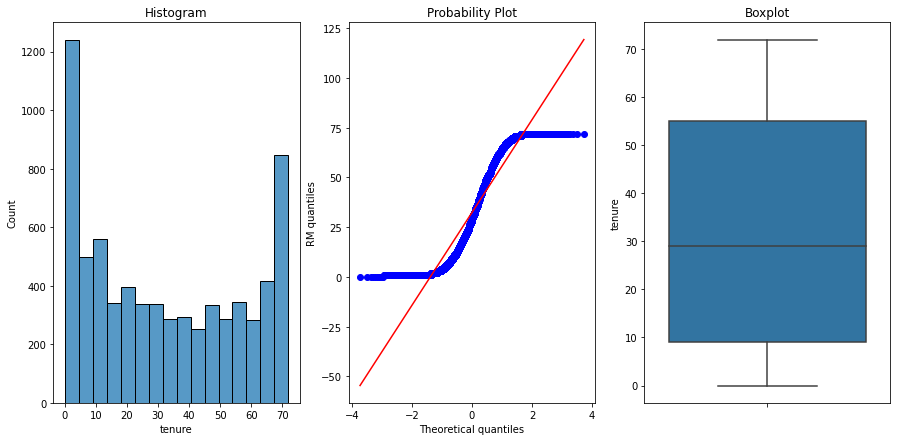

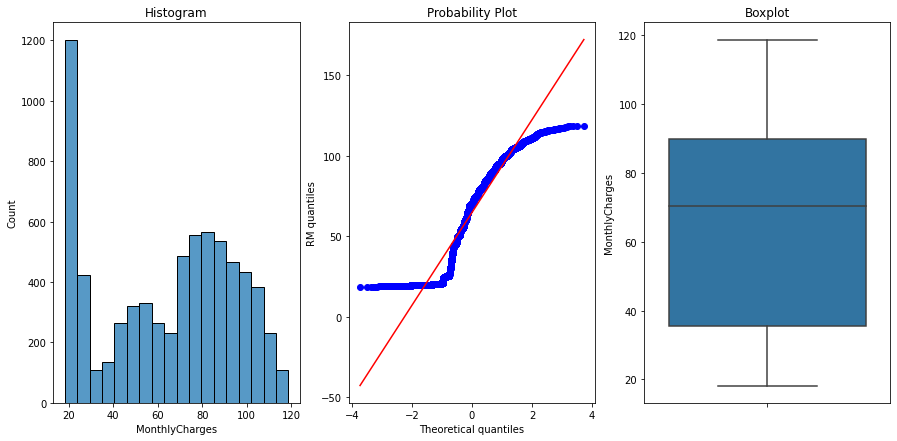

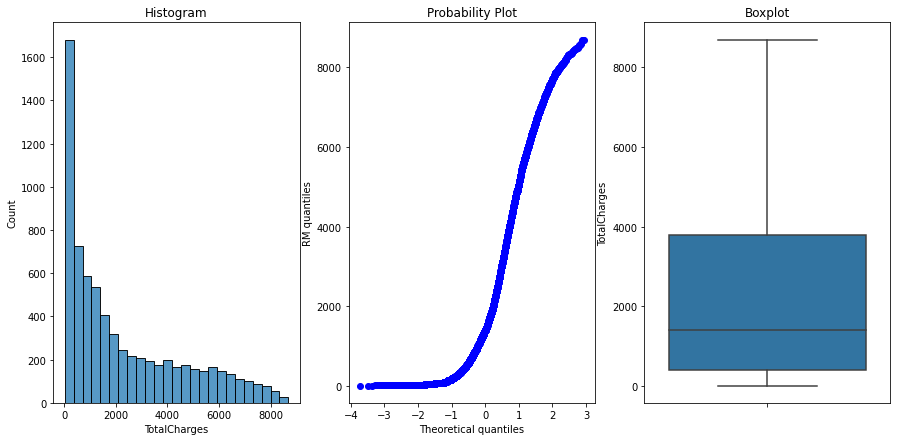

In [8]:
# Observing the distribution underneath the Continuous variables

for feature in n_cols:
    plt.figure(figsize=(15,7))

    plt.subplot(1, 3, 1)
    sns.histplot(data=data, x=feature)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')
    
plt.show()

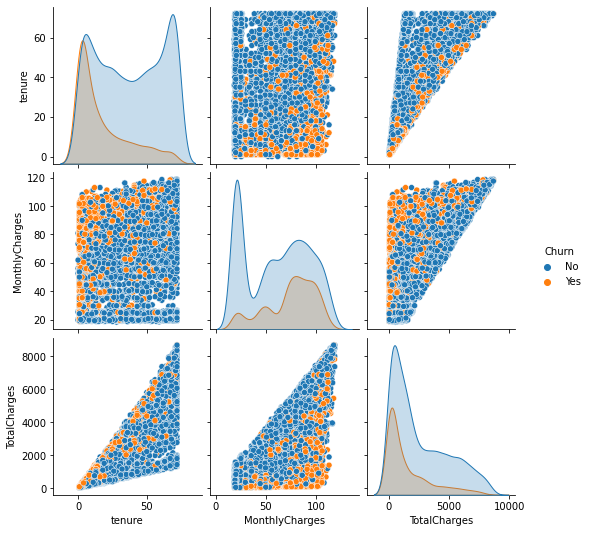

In [9]:
# distribution with our target variable
sns.pairplot(data.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

### Inference:
* Majority of the data has either tenure of 0 or 70. Distribution is not normal
* Majority of users pay 20 as a Monthly and roughtly 1500 as Total charges
* No Major outliers detected in the dataset

Text(0.5, 1.0, '% of Senior Citizens')

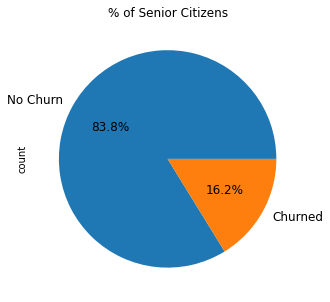

In [10]:
# pie chart for Count of Senior citizens
ax = (data['SeniorCitizen'].value_counts()/len(data)).plot.pie(autopct='%.1f%%', labels = ['No Churn', 'Churned'],figsize =(5,5), fontsize = 12)                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('% of Senior Citizens', fontsize = 12)

<Figure size 432x288 with 0 Axes>

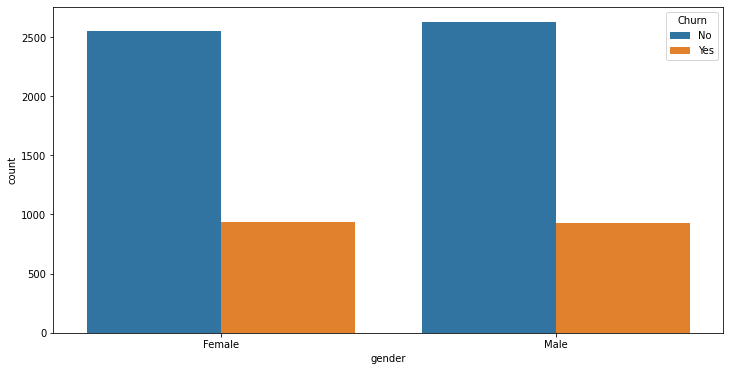

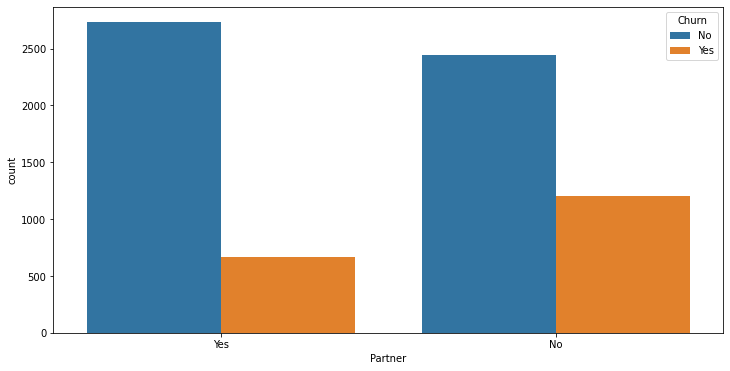

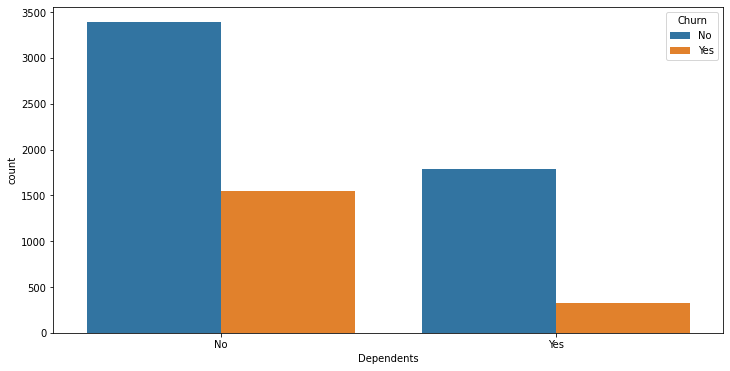

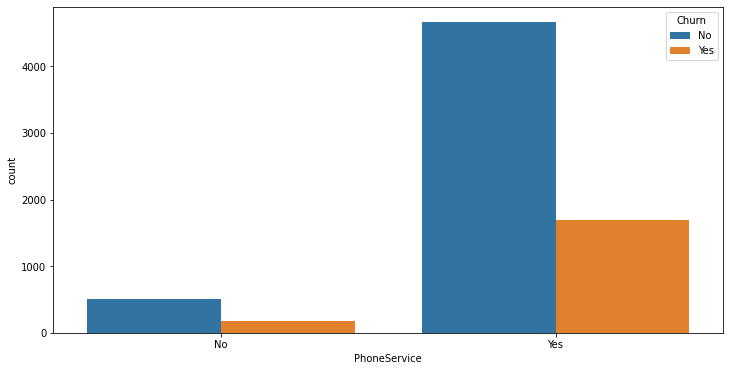

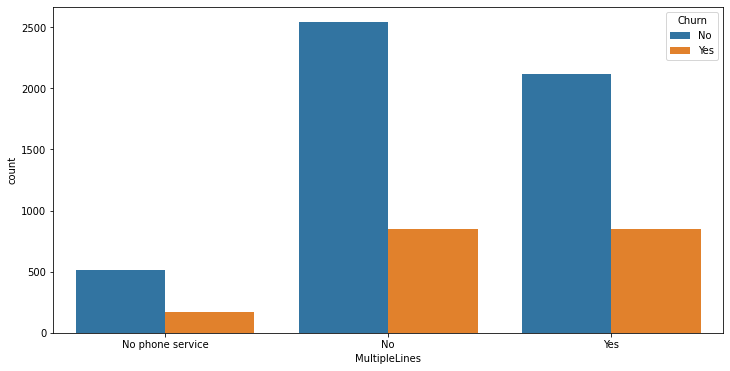

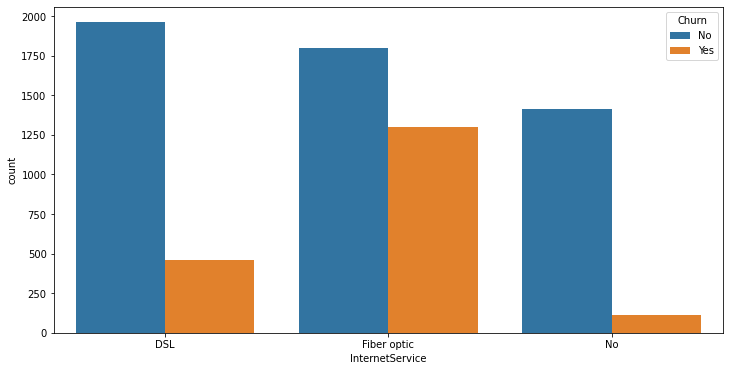

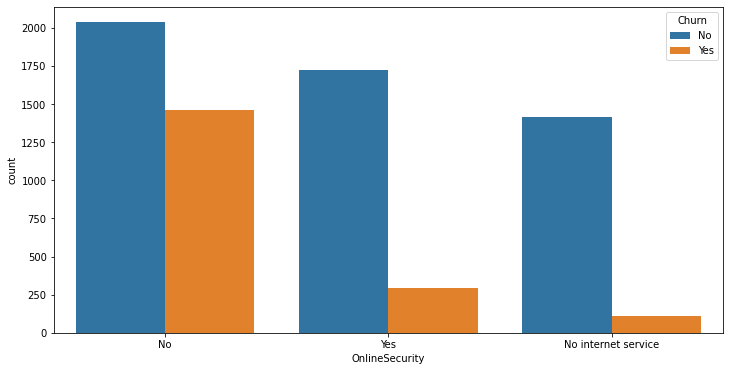

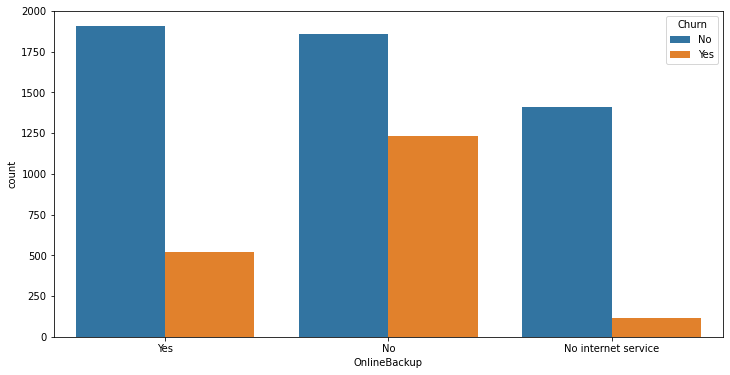

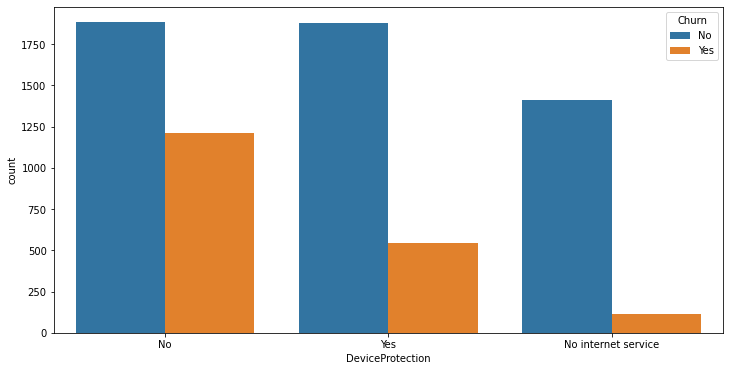

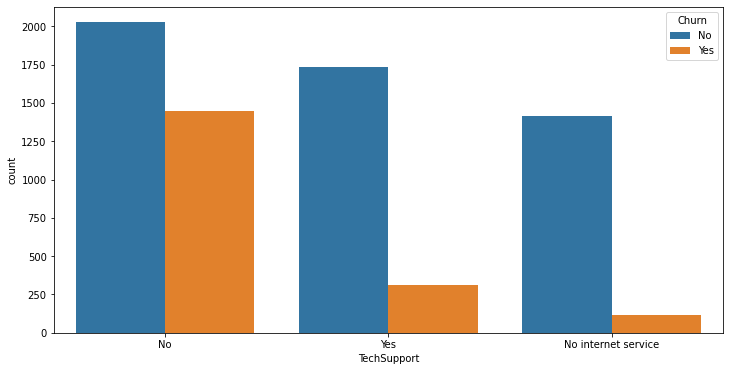

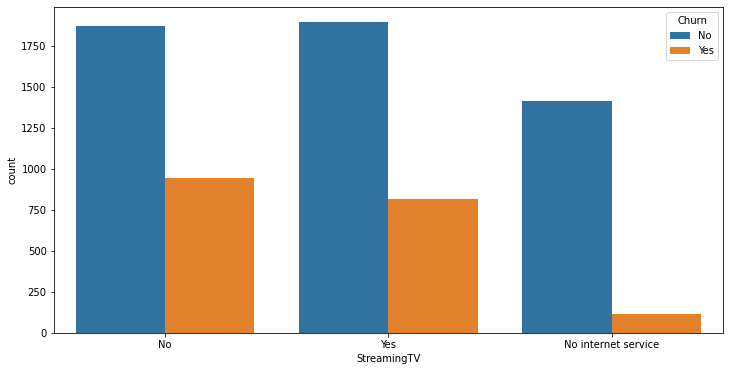

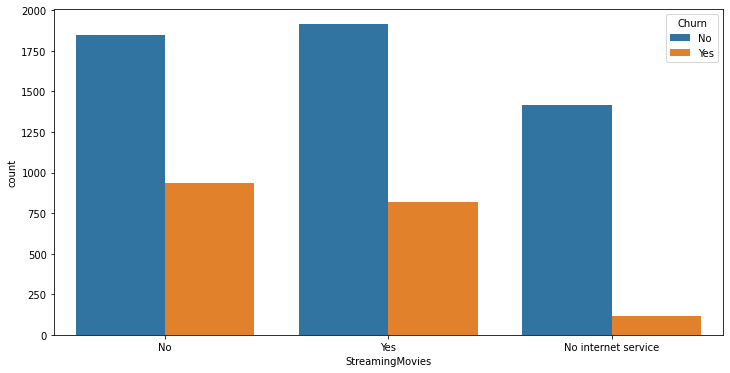

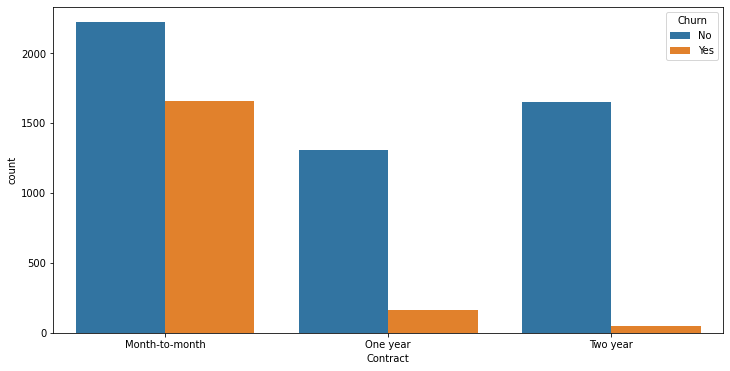

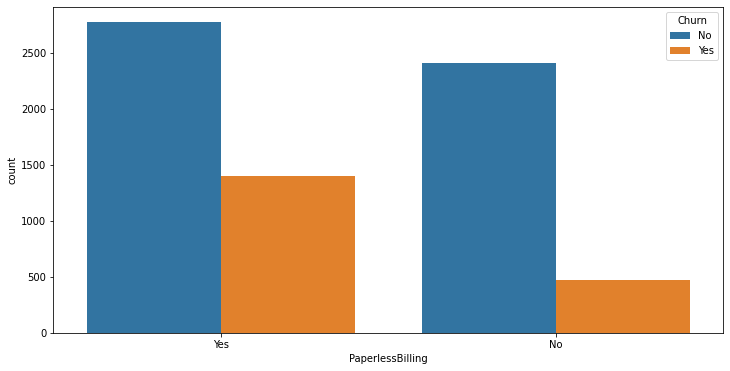

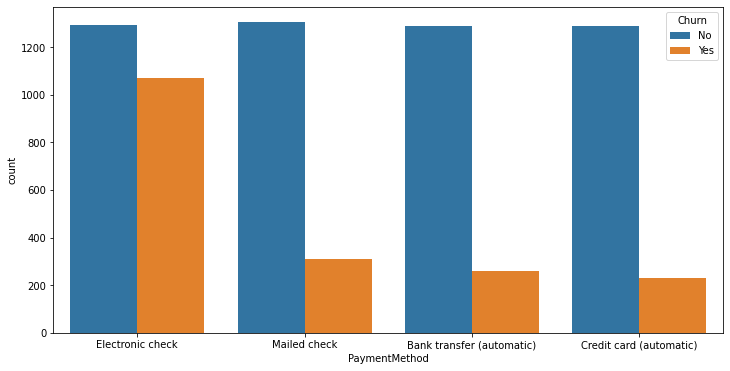

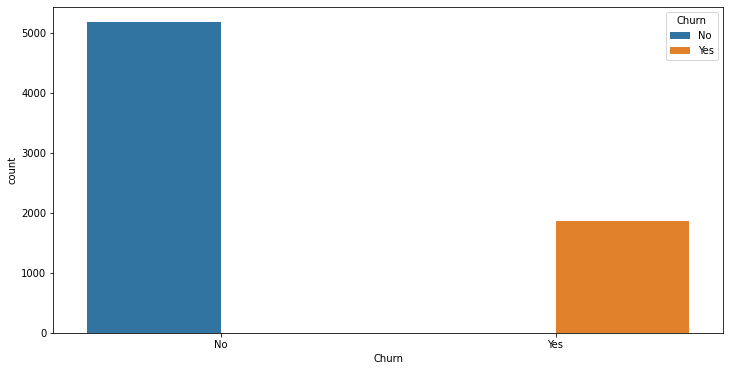

In [11]:
### Bivariate analysis

# categorical columns
c_cols = [i for i in data.columns if data[i].dtype == 'O']
c_cols.remove('customerID')

for i, feature in enumerate(c_cols):
    plt.figure(i)
    plt.figure(figsize=(12,6))
    sns.countplot(data=data, x=feature, hue='Churn')
plt.show()

# We will remove churn since it is a categorical variable
c_cols.remove("Churn")

### Inference:
* Some features that are having dispropotionate churn  -- Partner, dependent, phoneservice, fiberoptics, deviceprotection, techsupport electroniccheck, and contract. It is key to observe these features.

## Missing Values

In [12]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

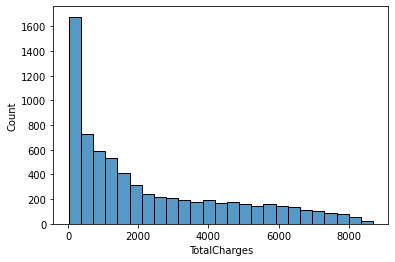

In [13]:
# Let's analyze total charges
sns.histplot(data["TotalCharges"])

# We will fill in the missing values by Median since the distribution is not the same.
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())



In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# To observe a dependencies on the categorical vs categorical variables, we will use chi-square test
# We will convert two columns into numpy array

# We will store all the p_values from chisquare test
p_vals={}
for i in c_cols:
    observed = pd.crosstab(data[i], data['Churn'])
    
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    
    p_vals[i] = [p]
p_vals = pd.DataFrame(p_vals)
p_vals = p_vals.T
p_vals = p_vals.rename(columns={0:"p_val"})
x = p_vals.sort_values(by="p_val", ascending=True)
x


,p_val
Contract,5.863038e-258
OnlineSecurity,2.661150e-185
TechSupport,1.443084e-180
InternetService,9.571788e-160
PaymentMethod,3.682355e-140
OnlineBackup,2.079759e-131
DeviceProtection,5.505219e-122
StreamingMovies,2.667757e-82
StreamingTV,5.528994e-82
PaperlessBilling,4.073355e-58


In [16]:
df = data.copy()
def dummies(x,df):
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

for i in c_cols:
    df = dummies(i, df)

for i in data.columns:
    df = df.rename(columns={i:i.replace(" ","_")})

In [17]:
df.dtypes

customerID                                object
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

In [18]:
n_cols = [x for x in df.columns if df[x].dtype == "bool"]

In [19]:
p_vals={}
for i in n_cols:
    observed = pd.crosstab(df[i], df['Churn'])
    
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    
    p_vals[i] = [p]
p_vals = pd.DataFrame(p_vals)
p_vals = p_vals.T
p_vals = p_vals.rename(columns={0:"p_val"})
x = p_vals.sort_values(by="p_val", ascending=True)
x

,p_val
InternetService_Fiber optic,4.940476e-147
Contract_Two year,1.337680e-141
PaymentMethod_Electronic check,2.528030e-141
DeviceProtection_No internet service,2.920300e-81
TechSupport_No internet service,2.920300e-81
StreamingMovies_No internet service,2.920300e-81
OnlineBackup_No internet service,2.920300e-81
OnlineSecurity_No internet service,2.920300e-81
InternetService_No,2.920300e-81
StreamingTV_No internet service,2.920300e-81


In [20]:
# Output Final Model after EDA
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

df = datapreparation(filepath = "data/Telco-Customer-Churn.csv")
df.to_csv("data/cleaned_data.csv", index=False)